In [2]:
import pandas as pd
import numpy as np

## load dataset

In [3]:
df = pd.read_csv('datamiskinsidorejo100.csv')
df.sample()

,nama,kelamin,pendidikan,pekerjaan,jumlah_tanggungan,lantai_rumah,dinding_rumah,daya_listrik,sumber_air,keputusan
42,ngasimun,pria,sma,pedagang,1,keramik,tembok,450 va,sumur,tidak miskin


In [4]:
df = df.drop(['nama'], axis = 1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   kelamin            100 non-null    object
 1   pendidikan         100 non-null    object
 2   pekerjaan          100 non-null    object
 3   jumlah_tanggungan  100 non-null    int64 
 4   lantai_rumah       100 non-null    object
 5   dinding_rumah      100 non-null    object
 6   daya_listrik       100 non-null    object
 7   sumber_air         100 non-null    object
 8   keputusan          100 non-null    object
dtypes: int64(1), object(8)
memory usage: 7.2+ KB


In [6]:
df['keputusan'].value_counts()

keputusan
tidak miskin    63
miskin          37
Name: count, dtype: int64

In [7]:
ind_col = [col for col in df.columns if col != 'keputusan']
dep_col = 'keputusan'

In [8]:
df[dep_col].value_counts()

keputusan
tidak miskin    63
miskin          37
Name: count, dtype: int64

In [9]:
mapping = {
    'kelamin': {'pria': 1, 'wanita': 2},
    'pendidikan': {'perguruan tinggi': 1, 'sma': 2, 'smp': 3, 'sd': 4, 'tidak sekolah':5},
    'pekerjaan': {'pegawai': 1, 'swasta':2, 'pedagang': 2, 'petani': 2,'pedagang/petani': 2, 'buruh': 3, 'tidak bekerja': 4},
    'jumlah_tanggungan': {'0': 1, '1': 2, '2': 3, '3': 4, '4': 4, '5': 4},
    'lantai_rumah': {'keramik': 1, 'tegel/tembok': 2, 'tanah/bambu': 3},
    'dinding_rumah': {'tembok': 1, 'semi-tembok': 2, 'kayu/bambu': 3},
    'daya_listrik': {'900 va': 1, '450 va': 2},
    'sumber_air': {'pam': 1, 'sumur': 2, 'mata air/sungai': 3},
    'keputusan': {'tidak miskin': 0, 'miskin': 1}
}
df = df.replace(mapping)

C:\Users\user\AppData\Local\Temp\ipykernel_13820\1626317482.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(mapping)


In [10]:
x = df[ind_col] #feature
y = df[dep_col] #label

In [11]:
df.head()

,kelamin,pendidikan,pekerjaan,jumlah_tanggungan,lantai_rumah,dinding_rumah,daya_listrik,sumber_air,keputusan
0,1,4,2,1,1,2,1,1,0
1,1,4,2,1,1,1,1,1,0
2,1,2,2,2,1,1,1,1,0
3,2,4,3,0,1,2,2,1,1
4,2,4,4,0,2,2,2,1,1


In [12]:
df.to_csv('databaru.csv', index=False)

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

## membuat model decision tree

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0, 
    random_state=42, splitter='best'
)

model = dtc.fit(x_train, y_train)

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"Akurasi Data Training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"Akurasi Data Testing = {dtc_acc} \n")

print(f"Confusion Matrix : \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
confusion = confusion_matrix(y_test, dtc.predict(x_test))
tn, fp, fn, tp = confusion.ravel()
print(f"Classification Report : \n {classification_report(y_test, dtc.predict(x_test))}")

Akurasi Data Training = 1.0
Akurasi Data Testing = 0.85 

Confusion Matrix : 
[[11  0]
 [ 3  6]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      0.67      0.80         9

    accuracy                           0.85        20
   macro avg       0.89      0.83      0.84        20
weighted avg       0.88      0.85      0.84        20



## Simulasi Model

In [15]:
input_data = (2,3,3,0,1,2,2,1)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0]==0):
    print ('Penduduk Tidak Miskin')
else :
    print ('Penduduk Miskin')

[1]
Penduduk Miskin


c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Visualisasi Pohon Keputusan

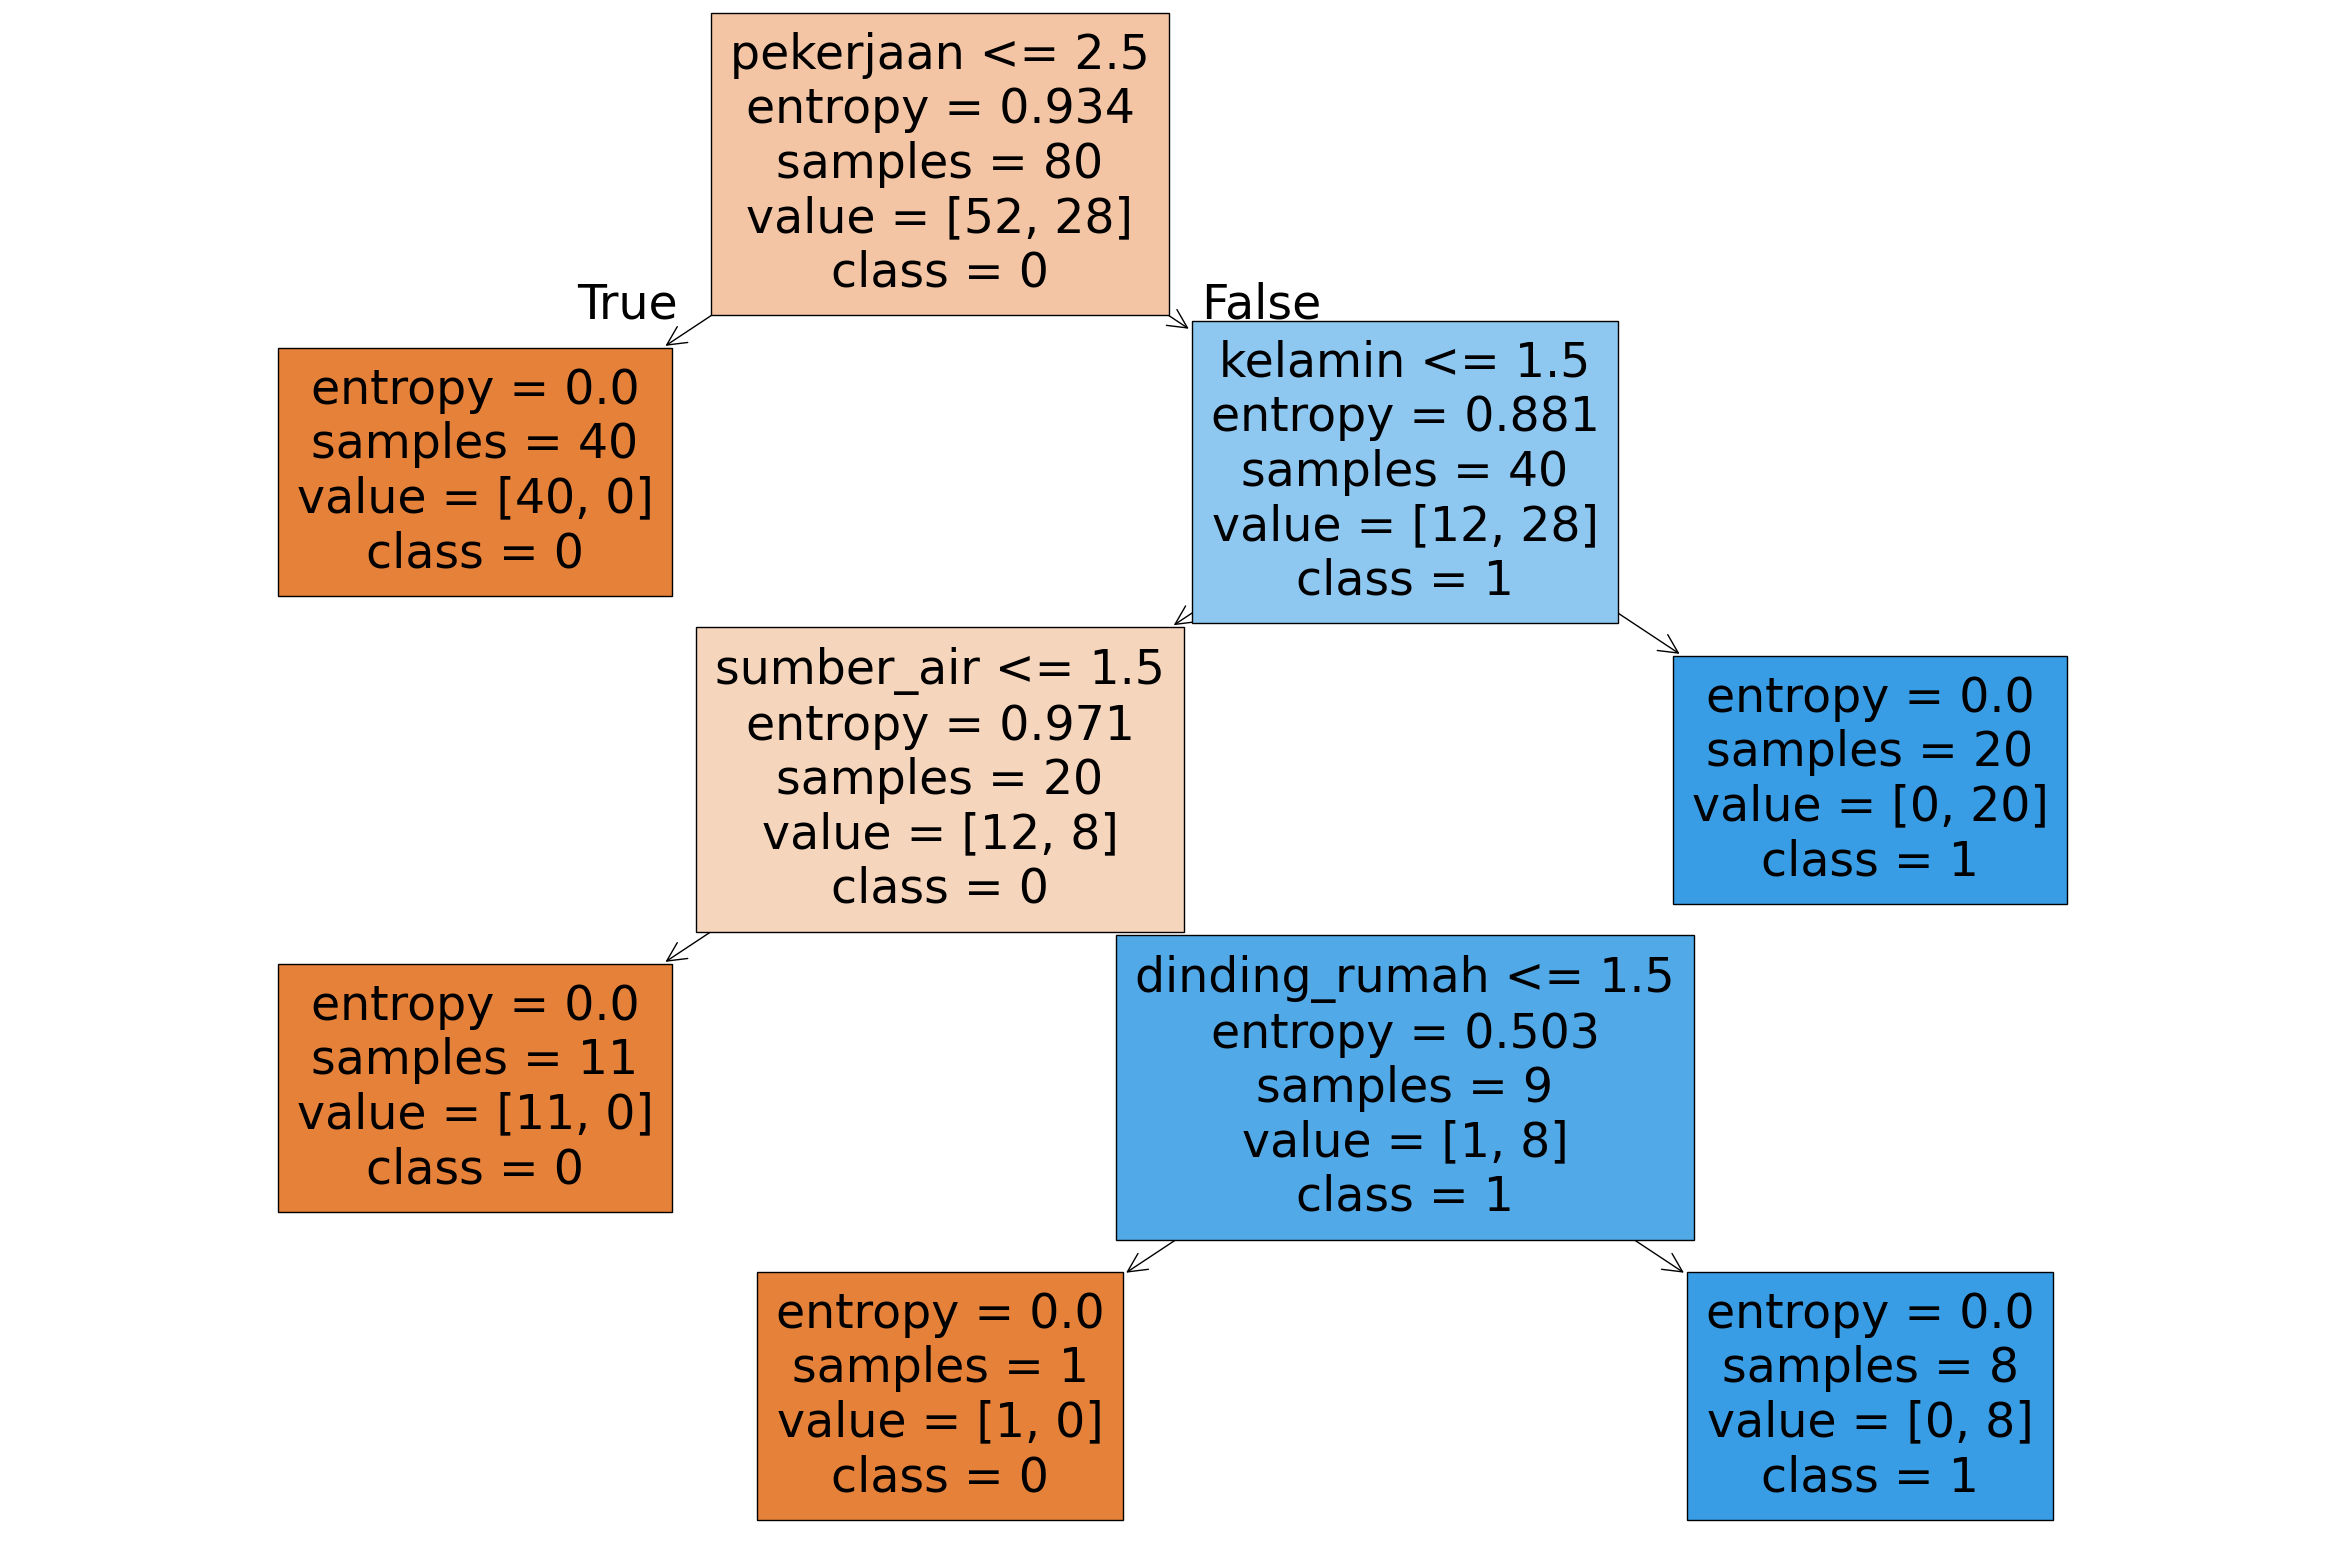

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,20))
_ = tree.plot_tree(model, 
                   feature_names=ind_col,
                   class_names=['0','1'],
                   filled=True)